# Series de tiempo sinusoidales con python
Estoy desarrollando varios experimentos sobre series temporales usando python, estos experimentos buscan aclarar los conceptos más sencillos y entender como aplicarlos a otras series más complejas.
En este caso contruyo una serie de tiempo de tipo sinusoidal, es decir una curva que describe una suave oscilacion periódica. Esta es una de las formas más básicas en función del tiempo.

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [42]:
from statsmodels.tsa.stattools import acf, pacf


Tiene la forma:
**x(t)=Acos(2πft+ϕ)**

donde:
* **A** = Amplitud, el pico de desviación de la función desde cero.
* **f** = Frecuencia, número de oscilaciones que ocurren cada unidad de tiempo.
* **t** = Conjunto de valores en el tiempo.
* **ϕ** = desplazamineto en la fase.


## Configuración de Parámetros
Generé diferentes ejemplos para ver los cambios en la serie de tiempo y entender un poco más como la afecta la modificación de cada parámetro.

### Ejercicion 1
A continuación construyo una serie sinusoidal con frecuencia de 5Hz, amplitud de 0.8 y con un retaso de fase de pi/4 radianes, el rango de valores de tiempo es entre 0 y 1 con diferencias de 0.01 constantes.

In [28]:
A = .8
f = 5
t = np.arange(0,1,.01)
phi = np.pi/4

Los valores de la serie se calculan con la formula antes descrita.

In [82]:
def get_xvalues(time, amp, freq, phase):
    vals = amp*np.cos(2*np.pi*freq*time + phase)
    print('Cantidad de registros {0}'.format(len(vals)))
    print('Values \n{0}'.format(vals[0:10]))
    return vals

In [94]:
def plot_wave(time, values):
    plt.figure(figsize=(16,7))
    plt.plot(time, values)
    plt.axhline(values.mean(), linestyle='dashed', color='red', label='Media')
    plt.legend(loc='upper right')
    plt.axis([0,1,-1,1])
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]


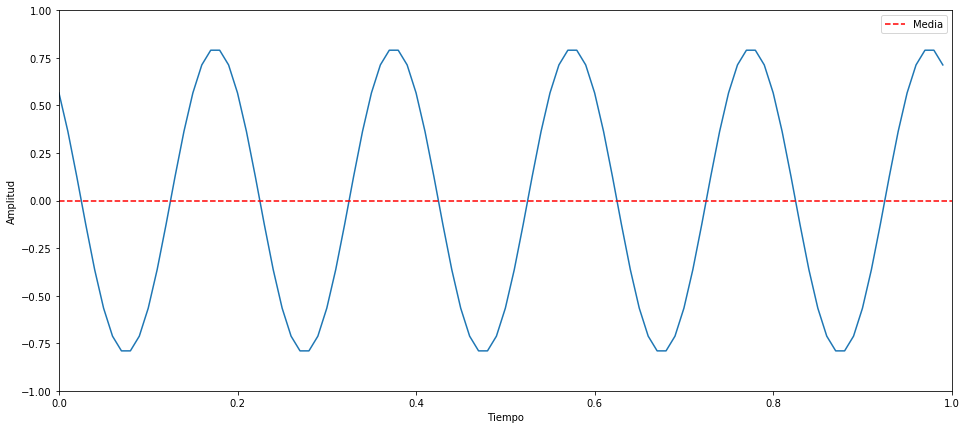

In [95]:
plot_wave(t, get_xvalues(t, A, f, phi))

### Ejercicio 2
Para ver los cambios voy a modificar algunos de los parámetros, voy a reducir la amplitud y a aumentar la frecuencia para apreciar los cambios.

Cantidad de registros 100
Values 
[ 0.21213203  0.06544297 -0.10162138 -0.2370465  -0.29866859 -0.26730196
 -0.15271242  0.00942323  0.16862501  0.27532639]


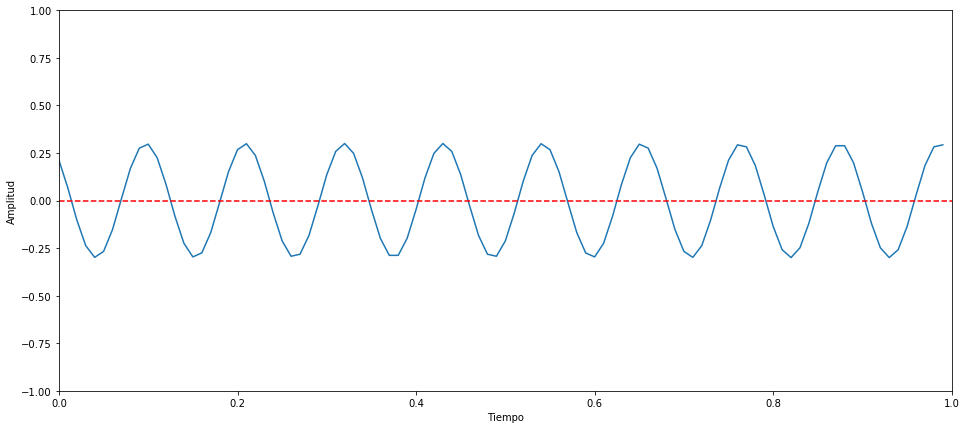

In [90]:
A2 = .3
f2 = 9
plot_wave(t, get_xvalues(t, A2, f2, phi))

Una variación muy clara que genera una onda mas corta que varia mucho más rápido.

### Ejercicio 3
Cambio de nuevo los valores de amplitud y frecuencia para apreciar mejor el cambio, en este caso aumento la amplitud y la frecuencia.

Cantidad de registros 100
Values 
[ 0.70003571 -0.44945059 -0.97781146 -0.15487012  0.88209646  0.70003571
 -0.44945059 -0.97781146 -0.15487012  0.88209646]


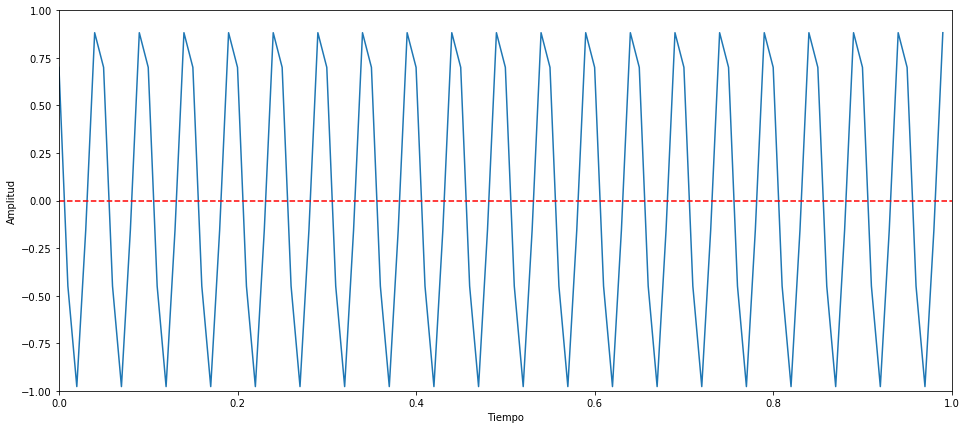

In [91]:
A3 = .99
f3 = 20
plot_wave(t, get_xvalues(t, A3, f3, phi))

En los casos anteriores la media se mantiene estable debito al comportamiento periódico de la serie.

### Ejercicio 4
En este caso cambio la fase para como afecta el comportamiento de la serie.

Cantidad de registros 100
Values 
[ 4.89858720e-17 -2.47213595e-01 -4.70228202e-01 -6.47213595e-01
 -7.60845213e-01 -8.00000000e-01 -7.60845213e-01 -6.47213595e-01
 -4.70228202e-01 -2.47213595e-01]


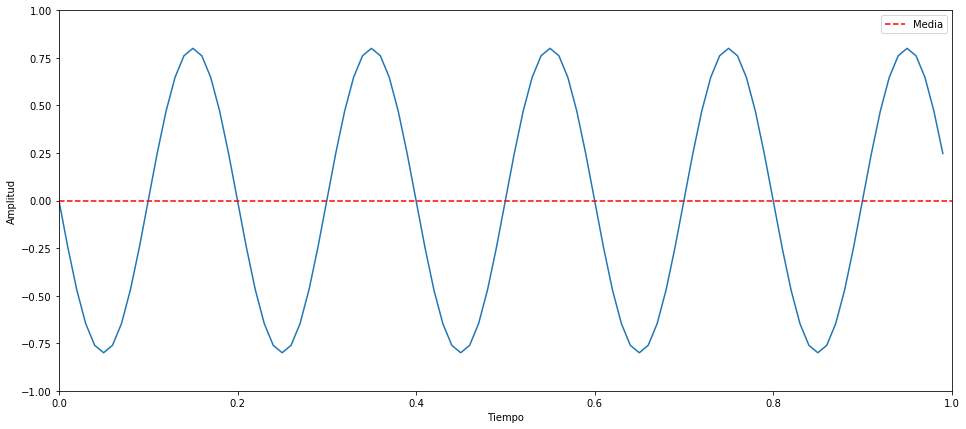

In [97]:
phi4 = np.pi/2
plot_wave(t, get_xvalues(t, A, f, phi4))

No parece haber ningun cambio, para comprobarlo voy a graficar la serie original y los cambios en el mismo gráfico.

In [103]:
def plot_waves(time, values1, values2):
    plt.figure(figsize=(16,7))
    plt.plot(time, values1, color='blue', label='values1')
    plt.plot(time, values2, color='green', label='values2')
    plt.axhline(values1.mean(), linestyle='dashed', color='red', label='Media')
    
    plt.legend(loc='upper right')
    plt.axis([0,1,-1,1])
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[ 4.89858720e-17 -2.47213595e-01 -4.70228202e-01 -6.47213595e-01
 -7.60845213e-01 -8.00000000e-01 -7.60845213e-01 -6.47213595e-01
 -4.70228202e-01 -2.47213595e-01]


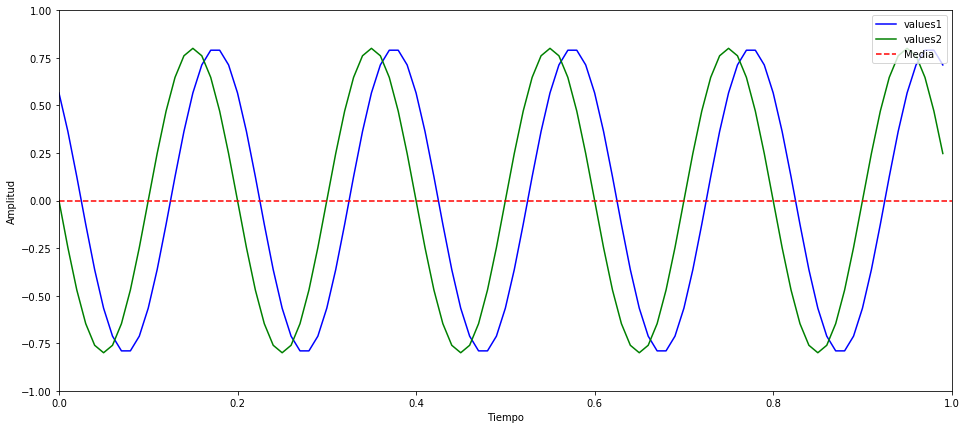

In [104]:
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi4))

Parece que la fase desplaza los valores sobre el eje del tiempo, en azul tenemos la serie original del ejemplo 1 y en verde una serie con la fase aumentada. en el caso de la serie en clolr verde la fase es igual a π/2, lo que hace que el desplazamiento sea más corto.

### Ejercicio 5
En este caso voy a dejar la fase completa con el valor de π.

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]


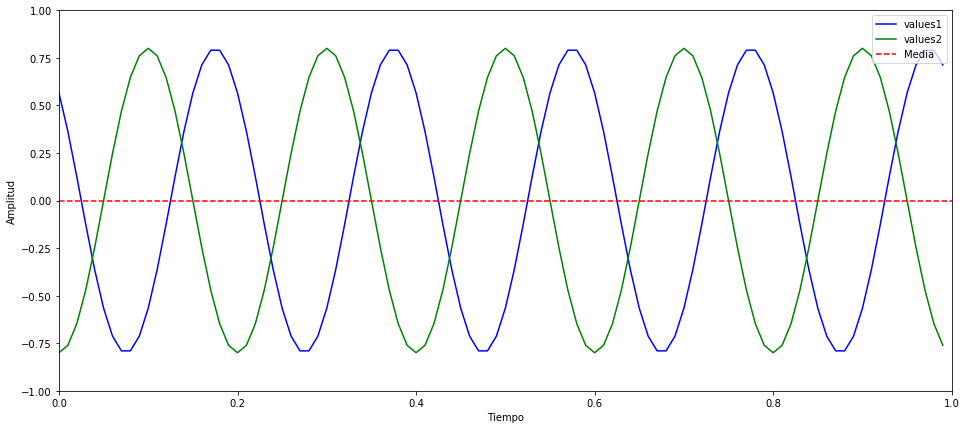

In [105]:
phi5 = np.pi
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi5))

En este caso se puede ver como los picos de la serie coinciden con los valores de la serie de tiempo y no están desplazados, tambien se puede ver la diferencia con el cambio de la fase.

### Ejercicio 6
¿Que pasa si hago la fase = 0? el objetivo de este ejercicio es probarlo.

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


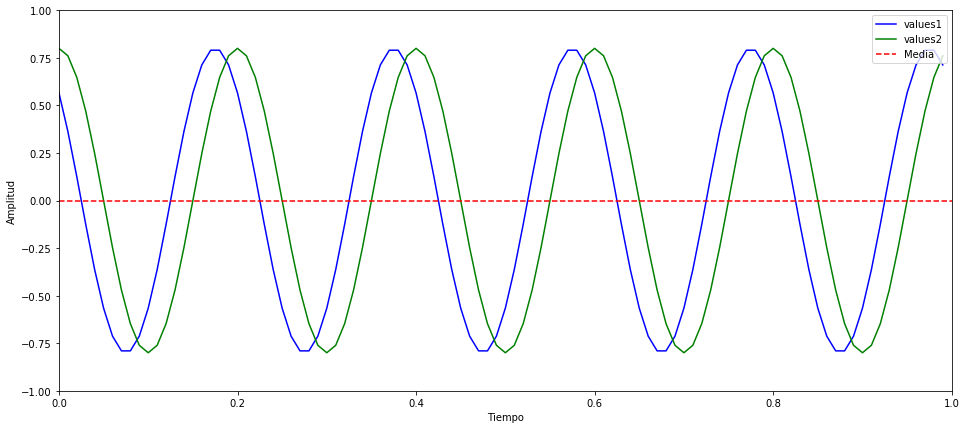

In [106]:
phi6 = 0
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi6))

Sim desplazamiento sobre la fase el primer valor de la serie es igual al de la aplitud y la diferencia es mínima con la serie original.

### Ejercicio 7
Comparacion entra fase = π contra fase = 0, es la comparación de los resultados de los ejercicios 5 y 6.

Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


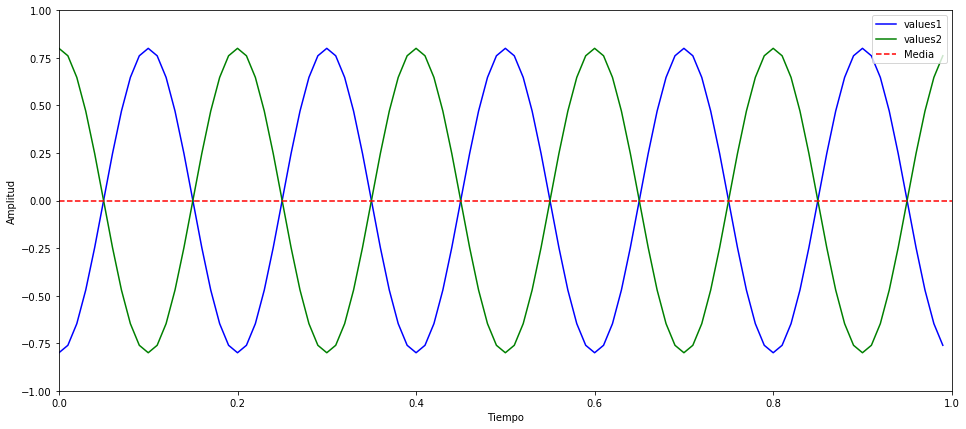

In [107]:
plot_waves(t, get_xvalues(t, A, f, phi5), get_xvalues(t, A, f, phi6))

En este ejercicio se puede ver una señal sin desplazamiento y otra con un desplazamiento completo de la fase, la señal 1 inicia con valores con amplitud de 8 mientras la desplazada inicia en -8.  

## Stationary
Para probar la propiedad de stationary de las series voy a usar como ejemplo la serie original con desplazamiento de π/4 y los desplazamientos de los ejercicios 5 y 6.

In [108]:
serie1 = get_xvalues(t, A, f, phi)
serie5 = get_xvalues(t, A, f, phi5)
serie6 = get_xvalues(t, A, f, phi6)

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


Defino la función para calcular la propiedad stationary.

In [116]:
def get_stationary(series):
    adf_result = adfuller(series)
    print('ADF Statistics: %f'%adf_result[0])
    print('p-value: %f'%adf_result[1])
    print('Critical values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f'%(key, value))
    
    if adf_result[0] < adf_result[4]['5%']:
        print('Rejected H0 - Time Series is Stationary')
    else:
        print('Failed to reject H0 - Time Series is Non-Stationary')

In [117]:
get_stationary(serie1)

ADF Statistics: -228112092744716.562500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [118]:
get_stationary(serie5)

ADF Statistics: -338735952836884.312500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [119]:
get_stationary(serie6)

ADF Statistics: -815928384444019.625000
p-value: 0.000000
Critical values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


## To Do's
Para continuar con este análisis, los siguientes pasos son:
* ~Validar la estacionalidad de cada serie (la generada en cada ejercicio) y ver como cambian los valores de ADF.~
* Aplicar ACF y PACF a cada serie y analizar los resultados.
* Probar una regresion lineal de almenos una de las series generadas.

### ACF

In [43]:
def get_autocorrelation_function(dataset, nlags=100):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
    
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_acf = acf(dataset, nlags=nlags, fft=False)
    
    nucount=0
    for autocorr in lag_acf:
        print('Lag {0} = {1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf,marker='o')
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=inf_confidence, linestyle='--',color='gray')
    plt.axhline(y=sup_confidence, linestyle='--',color='gray')
    
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9384557811884525
Lag 2 = 0.7869588019645235
Lag 3 = 0.5620615247799494
Lag 4 = 0.28714574943699794
Lag 5 = -0.010000000000000002
Lag 6 = -0.29998653987540214
Lag 7 = -0.5547304545757495
Lag 8 = -0.7501734873478763
Lag 9 = -0.8685515997723393
Lag 10 = -0.8999999999999999
Lag 11 = -0.8433501295589372
Lag 12 = -0.7060571025270288
Lag 13 = -0.503282999550702
Lag 14 = -0.2562440499995031
Lag 15 = 0.010000000000000106
Lag 16 = 0.2690848404379074
Lag 17 = 0.49595192934650223
Lag 18 = 0.6692717879103817
Lag 19 = 0.7734459481428239
Lag 20 = 0.8
Lag 21 = 0.7482444779294218
Lag 22 = 0.625155403089534
Lag 23 = 0.4445044743214547
Lag 24 = 0.22534235056200827
Lag 25 = -0.010000000000000238
Lag 26 = -0.23818314100041282
Lag 27 = -0.4371734041172551
Lag 28 = -0.5883700884728871
Lag 29 = -0.6783402965133087
Lag 30 = -0.7000000000000001
Lag 31 = -0.6531388262999065
Lag 32 = -0.5442537036520394
Lag 33 = -0.3857259490922073
Lag 34 = -0.194440651

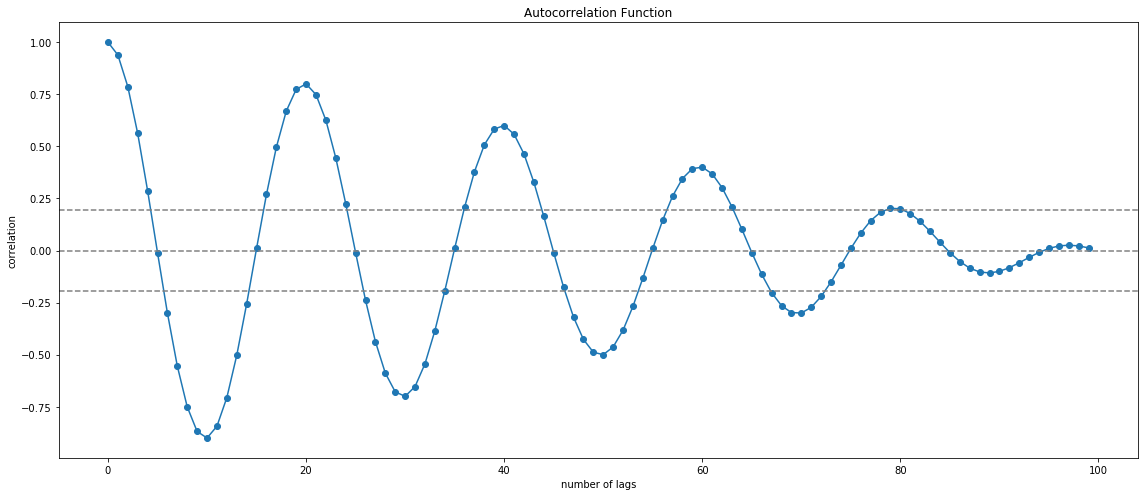

In [46]:
get_autocorrelation_function(series, 100)

### PACF

In [47]:
def get_partial_autocorrelation_function(dataset, nlags=99):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
      
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_pacf = pacf(dataset, nlags=nlags, method='ols')

    nucount=0
    for autocorr in lag_pacf:
        print('Lag {0} = {1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker='o')
    plt.axhline(y=0,linestyle='--', color='gray')
    plt.axhline(y=inf_confidence, linestyle='--', color='gray')
    plt.axhline(y=sup_confidence, linestyle='--', color='gray')
    
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('Number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9536229295591113
Lag 2 = -1.0
Lag 3 = -0.677145434292239
Lag 4 = -0.5180815635767257
Lag 5 = -0.42369387924364504
Lag 6 = -0.36046271507302874
Lag 7 = -0.3134063032962931
Lag 8 = -0.2742922596402917
Lag 9 = -0.23776412907378738
Lag 10 = -0.1999999999999999
Lag 11 = -0.15850941938252552
Lag 12 = -0.11253848571249381
Lag 13 = -0.06353919596346669
Lag 14 = -0.01500244422234808
Lag 15 = 0.028692622759061853
Lag 16 = 0.06385747042117042
Lag 17 = 0.08848080132188679
Lag 18 = 0.10219877914444864
Lag 19 = 0.10567294625501711
Lag 20 = 0.09999999999999998
Lag 21 = 0.08645968329955946
Lag 22 = 0.06656934694962899
Lag 23 = 0.042245520109903026
Lag 24 = 0.015848671060307
Lag 25 = -0.01001641656056728
Lag 26 = -0.0328913266141659
Lag 27 = -0.050848727789689144
Lag 28 = -0.06269107668364758
Lag 29 = -0.0679326083067967
Lag 30 = -0.06666666666666668
Lag 31 = -0.059441032268447144
Lag 32 = -0.0471970842835493
Lag 33 = -0.0312472007175534
Lag 

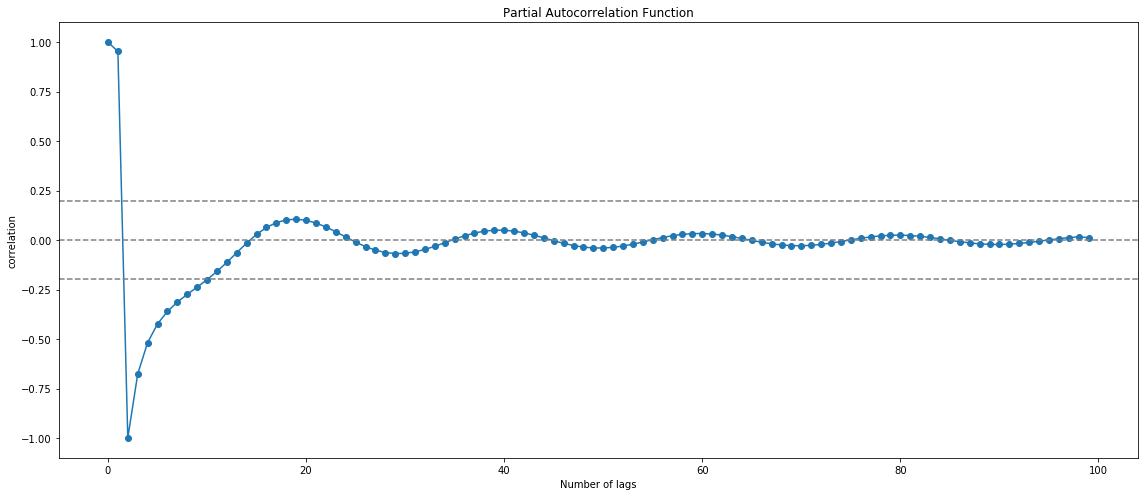

In [48]:
get_partial_autocorrelation_function(series, 99)

### ARIMA

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
p = 2
d = 2
q = 2

model = ARIMA(series, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

## Referencias
* [Making Sinusoids with Python](http://www.mrcolson.com/2015/12/24/Making-Sinusoids-with-Python.html)